### Klasifikasi Index Pembangunan Manusia Menggunakan Metode Random Forest

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [360]:
data = pd.read_csv("/content/IPM.csv")

In [361]:
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


DATA PREPROCESSING

In [362]:
#cek type data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [363]:
#cek kategori IPM ada apa saja
data['IPM'].unique()

array(['High', 'Normal', 'Very-High', 'Low'], dtype=object)

In [364]:
#cek jumlah data per kategori IPM
data['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

Visualisasi Data

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64


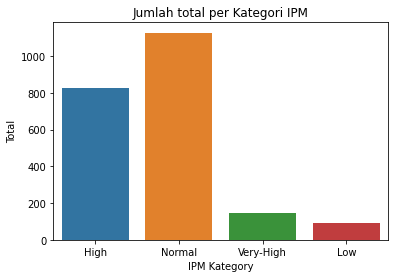

In [365]:
target = 'IPM'
ax = sns.countplot(x=target,data=data)
print(data[target].value_counts())

plt.xlabel("IPM Kategory")
plt.ylabel("Total")
plt.title("Jumlah total per Kategori IPM")
plt.show()

In [366]:
#Data Transformasi
data['IPM'][data['IPM'] == 'Low'] = 0
data['IPM'][data['IPM'] == 'Normal'] = 1
data['IPM'][data['IPM'] == 'High'] = 2
data['IPM'][data['IPM'] == 'Very-High'] = 3
data.head()

<ipython-input-366-5c66c59fc140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IPM'][data['IPM'] == 'Low'] = 0
<ipython-input-366-5c66c59fc140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IPM'][data['IPM'] == 'Normal'] = 1
<ipython-input-366-5c66c59fc140>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IPM'][data['IPM'] == 'High'] = 2
<ipython-input-366-5c66c59fc140>:5: SettingWithCopyWarning: 
A value is try

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,2
1,13.90,7148,9.48,65.28,1
2,14.32,8776,8.68,67.43,1
3,14.60,8180,8.88,64.40,1
4,14.01,8030,9.67,68.22,1


In [367]:
#Mengubah type data IPM
data['IPM'] = data['IPM'].astype("int64")

In [368]:
#Mendefinisikan variabel X dan Y
X = data.drop(['IPM'],axis = 1)
y = data['IPM']

SPLIT DATA, MODELING, DAN EVALUASI

TEST 1

In [369]:
#Membagi dataset menjadi data training dan testing dengan perbandingan 80:20 data digunakan sebagai data testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)
X_train.shape, X_test.shape

((1756, 4), (440, 4))

In [370]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

MODEL 1

In [371]:
#Membuat model random forest dengan banyak tree dalam forest adalah 250 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=250, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [372]:
#Inisialisi hasil prediksi model Random Forest dari data training
y_train_pred = classifier_rf.predict(X_train)
#Inisialisasi hasil prediksi model random forest dari data testing
y_test_pred = classifier_rf.predict(X_test)

Evaluasi Model 1

In [373]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9840909090909091


In [374]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       897
           2       1.00      1.00      1.00       668
           3       1.00      1.00      1.00       116

    accuracy                           1.00      1756
   macro avg       1.00      1.00      1.00      1756
weighted avg       1.00      1.00      1.00      1756



In [375]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.99      0.98      0.99       231
           2       0.98      0.98      0.98       161
           3       0.97      1.00      0.98        30

    accuracy                           0.98       440
   macro avg       0.98      0.99      0.99       440
weighted avg       0.98      0.98      0.98       440



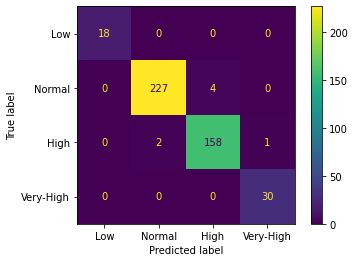

In [376]:
#Evaluasi model dengan confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low","Normal","High","Very-High" ])

cm_display.plot()
plt.show()

TEST 2

In [377]:
#Membagi dataset menjadi data training dan testing dengan perbandingan 90:10 data digunakan sebagai data testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 50)
X_train.shape, X_test.shape

((1976, 4), (220, 4))

In [378]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

MODEL 2

In [379]:
#Membuat model random forest dengan banyak tree dalam forest adalah 250 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=250, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [380]:
#Inisialisi hasil prediksi model Random Forest dari data training
y_train_pred = classifier_rf.predict(X_train)
#Inisialisasi hasil prediksi model random forest dari data testing
y_test_pred = classifier_rf.predict(X_test)

Evaluasi Model 2

In [381]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9818181818181818


In [382]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00      1005
           2       1.00      1.00      1.00       757
           3       1.00      1.00      1.00       130

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



In [383]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.98      1.00      0.99       123
           2       0.99      0.96      0.97        72
           3       0.94      0.94      0.94        16

    accuracy                           0.98       220
   macro avg       0.98      0.97      0.98       220
weighted avg       0.98      0.98      0.98       220



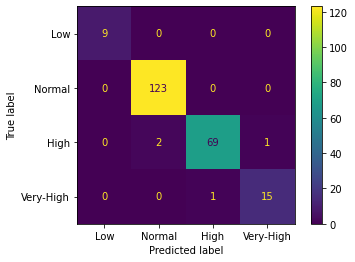

In [384]:
#Evaluasi model dengan confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low","Normal","High","Very-High" ])

cm_display.plot()
plt.show()

TEST 3

In [385]:
#Membagi dataset menjadi data training dan testing dengan perbandingan 80:20 data digunakan sebagai data testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)
X_train.shape, X_test.shape

((1756, 4), (440, 4))

In [386]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

MODEL 3

In [387]:
#Membuat model random forest dengan banyak tree dalam forest adalah 50 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=50, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [388]:
y_train_pred = classifier_rf.predict(X_train)
y_test_pred = classifier_rf.predict(X_test)

Evaluasi Model 3

In [389]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9840909090909091


In [390]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       897
           2       1.00      1.00      1.00       668
           3       1.00      1.00      1.00       116

    accuracy                           1.00      1756
   macro avg       1.00      1.00      1.00      1756
weighted avg       1.00      1.00      1.00      1756



In [391]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.99      0.98      0.99       231
           2       0.98      0.98      0.98       161
           3       0.97      1.00      0.98        30

    accuracy                           0.98       440
   macro avg       0.98      0.99      0.99       440
weighted avg       0.98      0.98      0.98       440



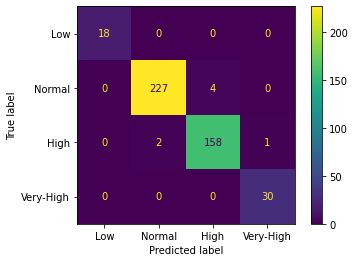

In [392]:
#Evaluasi model dengan confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low","Normal","High","Very-High" ])

cm_display.plot()
plt.show()

TEST 4

In [393]:
#Membagi dataset menjadi data training dan testing dengan perbandingan 90:10 data digunakan sebagai data testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 50)
X_train.shape, X_test.shape

((1976, 4), (220, 4))

In [394]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

MODEL 4

In [395]:
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators= 50, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [396]:
y_train_pred = classifier_rf.predict(X_train)
y_test_pred = classifier_rf.predict(X_test)

Evaluasi Model 4

In [397]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9863636363636363


In [398]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00      1005
           2       1.00      1.00      1.00       757
           3       1.00      1.00      1.00       130

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



In [399]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.98      1.00      0.99       123
           2       1.00      0.96      0.98        72
           3       0.94      1.00      0.97        16

    accuracy                           0.99       220
   macro avg       0.98      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220



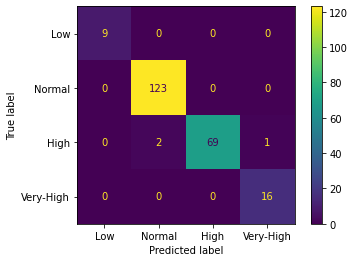

In [400]:
#Evaluasi model dengan confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low","Normal","High","Very-High" ])

cm_display.plot()
plt.show()